# Evaluation of the different Anomly Scores

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, colorbar, imshow, show, figure, subplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
%matplotlib inline

import os, sys, inspect
import csv

import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
save_plots = False

## Utils

In [3]:
from utils_vae_eval_paths import *

HISTORY_PATH = f'{potatonewdir}/saved_models'
PATH = MEASUREMENTS_FOLDER
FIGURES_FOLDER = FIGURES_FOLDER

In [4]:
def mean_of_mean(allMeans):
    """
    compute the mean of means and its error.
    """
    MeanOfMean = allMeans.mean()
    err = allMeans.std(ddof=1) / np.sqrt(len(allMeans))
    return MeanOfMean, err

## Evaluation Metrics: Compute Mean Results and their Errors

In [5]:
pd.options.display.float_format = "{:,.3}".format

COLUMN_NAMES = ['auc_score', 'specificity', 'sensitivity', 'precision', 
                'macro_f1', 'accuracy', 'misclassification']

In [6]:
latent_dim = 32

### SE

In [7]:
filename = f'J{latent_dim}_SE'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]


# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_SE    = res['accuracy'][0]
ACCERR_SE = res['accuracy'][1]

AUC_SE    = res['auc_score'][0]
AUCERR_SE = res['auc_score'][1]

res

J32_SE


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.734,0.666,0.695,0.677,0.68,0.68,0.32
error (+/-),0.00223,0.0126,0.0123,0.00501,0.00221,0.00223,0.00223


### SSIM

In [8]:
filename = f'J{latent_dim}_SSIM'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_SSIM    = res['accuracy'][0]
ACCERR_SSIM = res['accuracy'][1]

AUC_SSIM    = res['auc_score'][0]
AUCERR_SSIM = res['auc_score'][1]

res

J32_SSIM


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.923,0.885,0.845,0.88,0.865,0.865,0.135
error (+/-),0.00147,0.00482,0.00512,0.00417,0.00249,0.00248,0.00248


### ZNCC

In [9]:
filename = f'J{latent_dim}_ZNCC'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_ZNCC    = res['accuracy'][0]
ACCERR_ZNCC = res['accuracy'][1]

AUC_ZNCC    = res['auc_score'][0]
AUCERR_ZNCC = res['auc_score'][1]

res

J32_ZNCC


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.653,0.61,0.642,0.623,0.625,0.626,0.374
error (+/-),0.00293,0.0132,0.0121,0.00404,0.00258,0.00241,0.00241


### GMSD

In [10]:
filename = f'J{latent_dim}_GMSD'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_GMSD    = res['accuracy'][0]
ACCERR_GMSD = res['accuracy'][1]

AUC_GMSD    = res['auc_score'][0]
AUCERR_GMSD = res['auc_score'][1]

res

J32_GMSD


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.851,0.779,0.779,0.78,0.779,0.779,0.221
error (+/-),0.00169,0.00818,0.00669,0.00513,0.00226,0.00225,0.00225


### IMED

In [11]:
filename = f'J{latent_dim}_IMED'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_IMED    = res['accuracy'][0]
ACCERR_IMED = res['accuracy'][1]

AUC_IMED    = res['auc_score'][0]
AUCERR_IMED = res['auc_score'][1]

res

J32_IMED


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.722,0.665,0.681,0.672,0.672,0.673,0.327
error (+/-),0.00321,0.0122,0.0134,0.00458,0.00276,0.00277,0.00277


### Bar Plot over Accuracy

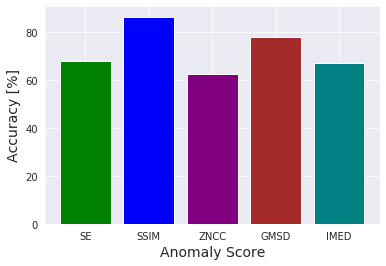

In [12]:
N = 5
ANOMALY_SCORE  = ['SE','SSIM','ZNCC','GMSD','IMED']
ACCURACY       = (ACC_SE*100, ACC_SSIM*100, ACC_ZNCC*100, ACC_GMSD*100, ACC_IMED*100)
STD_ERROR      = (ACCERR_SE*100, ACCERR_SSIM*100, ACCERR_ZNCC*100, ACCERR_GMSD*100, ACCERR_IMED*100)

New_Colors = ['green','blue','purple','brown','teal']
plt.bar(ANOMALY_SCORE, ACCURACY, color=New_Colors)
plt.xlabel('Anomaly Score', fontsize=14)
plt.ylabel('Accuracy [%]', fontsize=14)
plt.grid(True)
plt.show()

## Stat. on ROC Curve



In [13]:
import re

def make_dataframe(df, column_name=column_name):
    
    def convert_str_to_float(df, column_name=column_name, row_number=0):
        def urlify(s):
            """
            Source: https://stackoverflow.com/questions/1007481/how-do-i-replace-whitespaces-with-underscore
            """
            # Remove all non-word characters (everything except numbers and letters)
            #s = re.sub(r"[^\w\s]", '', s)

            # Replace all runs of whitespace with a single dash
            s = re.sub(r"\s+", ',', s)
            return s
        
        """ convert to numpy arrays """
        # remove white space from string type:
        column = df[f'{column_name}'][row_number]
        string = urlify(column)

        # convert from string to list:
        listRes = string.strip('][').split(',')
        listRes = listRes[:-1]                        # delete last white element space 

        # convert from list to (float) numpy array
        array = np.array(listRes, dtype=np.float64)
        return array
    
    """ contruct new dataframe """
    # construct column names:
    N = len(df[f'{column_name}'])
    set_column_names = []
    for i in range(N):
        set_column_names.append(f'n={i}')
    
    # make new dataframe:
    df_new = pd.DataFrame(columns=set_column_names)
    for row_number in range(len(df[f'{column_name}'])):
        array = convert_str_to_float(df, column_name=column_name, row_number=row_number)

        for j in range(len(array)):
            df_new.loc[j, f'{set_column_names[row_number]}'] = array[j]
    return df_new    

In [14]:
COLUMN_NAMES = ['fpr', 'tpr']

### Get Data

#### SE

In [15]:
filename = f'J{latent_dim}_SE'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
SE_fprQ1 = df_fpr['Q1'].to_numpy()
SE_fprQ2 = df_fpr['Q2'].to_numpy()
SE_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
SE_tprQ1 = df_tpr['Q1'].to_numpy()
SE_tprQ2 = df_tpr['Q2'].to_numpy()
SE_tprQ3 = df_tpr['Q3'].to_numpy()

J32_SE fpr
J32_SE tpr


#### SSIM

In [16]:
filename = f'J{latent_dim}_SSIM'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
SSIM_fprQ1 = df_fpr['Q1'].to_numpy()
SSIM_fprQ2 = df_fpr['Q2'].to_numpy()
SSIM_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
SSIM_tprQ1 = df_tpr['Q1'].to_numpy()
SSIM_tprQ2 = df_tpr['Q2'].to_numpy()
SSIM_tprQ3 = df_tpr['Q3'].to_numpy()

J32_SSIM fpr
J32_SSIM tpr


#### ZNCC

In [17]:
filename = f'J{latent_dim}_ZNCC'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
ZNCC_fprQ1 = df_fpr['Q1'].to_numpy()
ZNCC_fprQ2 = df_fpr['Q2'].to_numpy()
ZNCC_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
ZNCC_tprQ1 = df_tpr['Q1'].to_numpy()
ZNCC_tprQ2 = df_tpr['Q2'].to_numpy()
ZNCC_tprQ3 = df_tpr['Q3'].to_numpy()

J32_ZNCC fpr
J32_ZNCC tpr


#### GMSD

In [18]:
filename = f'J{latent_dim}_GMSD'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
GMSD_fprQ1 = df_fpr['Q1'].to_numpy()
GMSD_fprQ2 = df_fpr['Q2'].to_numpy()
GMSD_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
GMSD_tprQ1 = df_tpr['Q1'].to_numpy()
GMSD_tprQ2 = df_tpr['Q2'].to_numpy()
GMSD_tprQ3 = df_tpr['Q3'].to_numpy()

J32_GMSD fpr
J32_GMSD tpr


#### IMED

In [19]:
filename = f'J{latent_dim}_IMED'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
IMED_fprQ1 = df_fpr['Q1'].to_numpy()
IMED_fprQ2 = df_fpr['Q2'].to_numpy()
IMED_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
IMED_tprQ1 = df_tpr['Q1'].to_numpy()
IMED_tprQ2 = df_tpr['Q2'].to_numpy()
IMED_tprQ3 = df_tpr['Q3'].to_numpy()

J32_IMED fpr
J32_IMED tpr


### Plot

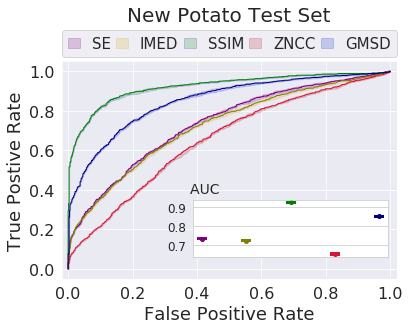

In [20]:
LARGE_FRONT  = 20
MEDIUM_FRONT = 18
SMALL_FRONT  = 16

sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0.8
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

lw = 1.0

ax.plot(SE_fprQ2 , SE_tprQ2, '-', color='purple', lw=lw)
ax.fill_between(SE_fprQ2, SE_tprQ1, SE_tprQ3, alpha=0.2, edgecolor='purple', facecolor='purple', linewidth=1, 
                antialiased=True, label='SE')
 
ax.plot(IMED_fprQ2 , IMED_tprQ2, '-', color='olive', lw=lw)
ax.fill_between(IMED_fprQ2, IMED_tprQ1, IMED_tprQ3, alpha=0.2, edgecolor='goldenrod', facecolor='goldenrod', linewidth=1, 
                antialiased=True, label='IMED')

ax.plot(SSIM_fprQ2 , SSIM_tprQ2, '-', color='g', lw=lw)
ax.fill_between(SSIM_fprQ2, SSIM_tprQ1, SSIM_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='g', linewidth=1, 
                antialiased=True, label='SSIM')

ax.plot(ZNCC_fprQ2 , ZNCC_tprQ2, '-', color='crimson', lw=lw)
ax.fill_between(ZNCC_fprQ2, ZNCC_tprQ1, ZNCC_tprQ3, alpha=0.2, edgecolor='firebrick', facecolor='firebrick', linewidth=1, 
                antialiased=True, label='ZNCC')

ax.plot(GMSD_fprQ2 , GMSD_tprQ2, '-', color='navy', lw=lw)
ax.fill_between(GMSD_fprQ2 , GMSD_tprQ1, GMSD_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC', linewidth=1, 
                antialiased=True, label='GMSD')

plt.xlabel('False Positive Rate', fontsize=MEDIUM_FRONT) 
plt.ylabel('True Postive Rate', fontsize=MEDIUM_FRONT)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05]) #plt.ylim([-0.02, 1.03])
plt.title("New Potato Test Set", fontsize=LARGE_FRONT, pad=40)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FRONT)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=5,
               numpoints=1, fontsize=15) 

# Inset AUC scores:
sns.set_style("whitegrid")
inset = fig.add_axes([0.43, 0.2, 0.45, 0.2])
N = (1,2,3,4,5)
ALL_AUC    = (AUC_SE, AUC_IMED, AUC_SSIM, AUC_ZNCC, AUC_GMSD)
ALL_AUCERR = (AUCERR_SE, AUCERR_IMED, AUCERR_SSIM, AUCERR_ZNCC, AUCERR_GMSD)
colors = ['purple', 'olive', 'g', 'crimson', 'navy']
for pos, y, err, colors in zip(N, ALL_AUC, ALL_AUCERR, colors):
    inset.errorbar(pos, y, err, fmt="o", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=4, color=colors)
#inset.set_ylabel('AUC', fontsize=12)
inset.set_title("AUC                                      ", fontsize=14)
inset.set_xticks([]) 
inset.tick_params(axis='both', which='major', labelsize=12)

plt.gca()
if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/ROCQuantiles_potatoNew.png", dpi=300, bbox_inches='tight')
plt.show()